## ✔️관통프로젝트

넷플릭스 주가 데이터 분석



##### ✔️변수 정리

df : 최초 Netflix 데이터
select_type : 'Date', 'Open', 'High', 'Low', 'Close' 필드만 선택한 데이터
select_date : 2021년 이후 데이터 필터링한 데이터
select_month_average : 2021년 이후 데이터를 월별로 그룹화하여 각 항목의 평균을 낸 데이터
select_date_2022 : 2022년도 이후 데이터 필터링한 데이터

종가 최고치 : close_max
종가 최저치 : close_min

In [ ]:
# 모듈 및 데이터 다운로드

import kagglehub
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download latest version
path = kagglehub.dataset_download("jainilcoder/netflix-stock-price-prediction")

print("Path to dataset files:", path)



Path to dataset files: C:\Users\SSAFY\.cache\kagglehub\datasets\jainilcoder\netflix-stock-price-prediction\versions\1


In [117]:
# 다운로드 한 데이터 확인

file_path = 'NFLX.csv'

df = pd.read_csv(file_path)
display(df.head(5))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


## ⭐ F01 : 데이터 전처리
```
요구사항 : CSV 파일 읽기 및 필드 선택
```
Netflix 주가 데이터(NFLX.csv)를 pandas를 사용해 DataFrame으로 읽어온다. 이 때, 'Date', 'Open', 'High', 'Low', 'Close' 필드만 선택한다. 


In [ ]:
select_type = df.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
display(select_type)

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


## ⭐ F02 : 데이터 전처리
```
요구사항 : 날짜 필터링
```
2021년 이후 데이터 필터링


In [73]:
# F02 : 데이터 전처리
# 날짜 필터링
# 2021년 이후 데이터 필터링 요청
# select_date에서 특정 날짜 이후만 출력될 수 있도록 설정

select_date = select_type.loc[select_type['Date'] > '2020-12-31']
display(select_date)


,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


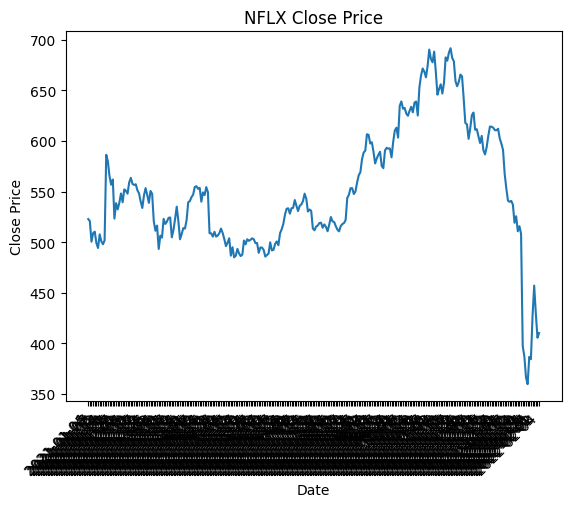

In [74]:
# F02 시각화 자료

x = select_date['Date']
y = select_date['Close']

plt.plot(x, y)
# 3. 글자 각도 45도로 기울이기
plt.xticks(rotation=45, ha='right')

plt.title('NFLX Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

## F03 : 데이터 분석
```
요구사항 : 최고 / 최저 종가 추출
```
2021년 이후 데이터에서 종가(Close)의 최대/최소 값을 추출 

In [52]:
# F03 : 데이터 분석
# 최고 / 최저 종가 추출
# close_max 값 및 close_min 값 추출

close_max = select_date['Close'].max()
print(f'최고 종가 : {close_max}')
close_min = select_date['Close'].min()
print(f'최저 종가 : {close_min}')

최고 종가 : 691.690002
최저 종가 : 359.700012


## F04 : 데이터 시각화 1

```
요구사항 : 월별 평균 종가 계산
```
2021년 이후 데이터를 월별로 그룹화함

In [ ]:
# F04 : 월별 평균 종가 계산
# 2021년 이후 데이터를 월별로 그룹화하여 평균 종가를 계산하여 시각화
# select_month : 2021년 이후 데이터를 월별로 그룹화함
# select_month_average : 월별로 묶은 데이터에서 Date에 따른 Close의 값의 평균을 구함

select_date['Date'] = select_date['Date'].str[:7]
select_month = select_date.copy()

display(select_month)

select_month_average = select_month.groupby('Date').mean(numeric_only=True).reset_index()
display(select_month_average)



C:\Users\SSAFY\AppData\Local\Temp\ipykernel_12272\420233366.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_date['Date'] = select_date['Date'].str[:7]


,Date,Open,High,Low,Close
733,2021-01,539.000000,540.799988,515.090027,522.859985
734,2021-01,521.549988,526.780029,515.890015,520.799988
735,2021-01,511.970001,513.099976,499.500000,500.489990
736,2021-01,508.279999,516.440002,506.420013,508.890015
737,2021-01,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01,401.970001,427.700012,398.200012,427.140015
1005,2022-02,432.959991,458.480011,425.540009,457.130005
1006,2022-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02,421.440002,429.260010,404.279999,405.600006


,Date,Open,High,Low,Close
0,2021-01,530.531051,537.838944,519.854214,526.816845
1,2021-02,547.777366,555.494205,540.621576,548.959999
2,2021-03,519.429134,527.057390,511.326090,518.123482
3,2021-04,532.810952,537.802858,527.041430,533.136662
4,2021-05,496.923996,502.062502,491.996503,496.714497
5,2021-06,503.470914,508.116364,498.675455,503.324091
6,2021-07,528.609045,534.298567,522.618091,528.653330
7,2021-08,529.884541,535.937267,526.222275,532.346817
8,2021-09,589.405233,598.170003,583.384760,590.795239
9,2021-10,639.220474,648.829043,632.430001,642.202849


## F04 : 데이터 시각화2

```
요구사항 : 월별 평균 종가 계산
```
그룹화 한 데이터를 matplot을 이용하여 시각화함

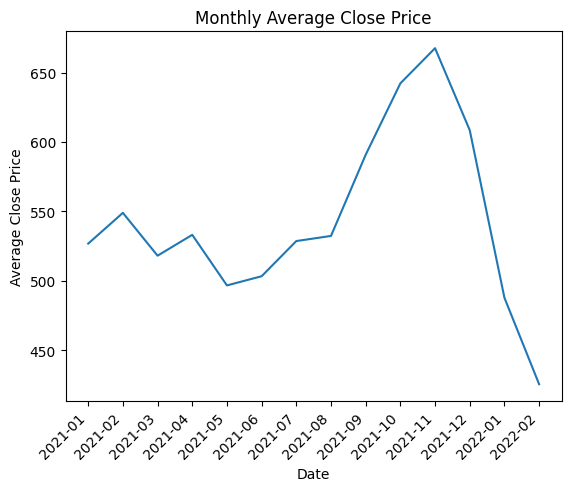

In [115]:
# F04 시각화 자료

# x축과 y축 데이터 설정
x = select_month_average['Date']
y = select_month_average['Close']

# plot 생성
plt.plot(x, y)

# plot 축 이름 설정
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')

# x축 디자인 설정 시작
ax = plt.gca()  # 현재 Axes 객체 가져오기

# 1. 30일 간격으로 주요 눈금 위치 지정
ax.xaxis.set_major_locator(mdates.DayLocator())

# 2. 글자 각도 45도로 기울이기
plt.xticks(rotation=45, ha='right')

# 데이터 출력
plt.show()

## F05 : 데이터 시각화

요구사항 : 월별 최고 / 최저 / 종가 시각화  
```
2022년도 이후 데이터를 바탕으로 3가지 지표를 하나의 그래프에 시각화
```

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998
990,2022-01-10,538.489990,543.690002,526.320007,539.849976
991,2022-01-11,536.989990,543.909973,530.070007,540.840027
992,2022-01-12,544.270020,544.270020,532.020020,537.219971
993,2022-01-13,537.059998,540.789978,518.260010,519.200012
994,2022-01-14,517.599976,538.369995,511.880005,525.690002


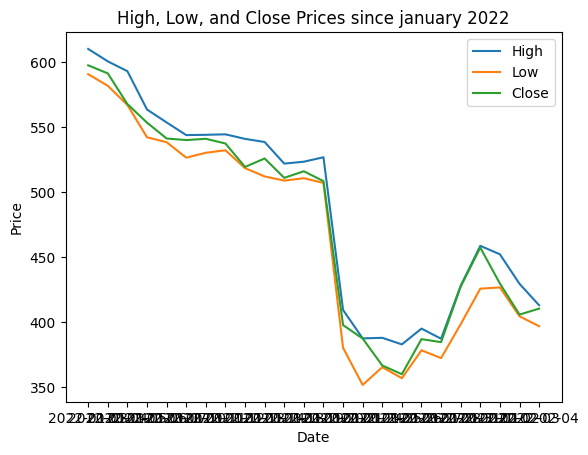

In [78]:
select_date_2022 = select_type.loc[select_type['Date'] > '2021-12-31']
display(select_date_2022)

x = select_date_2022['Date']
y = select_date_2022['High']
y1 = select_date_2022['Low']
y2 = select_date_2022['Close']

plt.plot(x, y, label='High')
plt.plot(x, y1, label='Low')
plt.plot(x, y2, label='Close')

plt.legend()

plt.title('High, Low, and Close Prices since january 2022')
plt.xlabel('Date')
plt.ylabel('Price')

plt.show()



## ⭐ F06 : 생성형 AI

요구사항 : 주가 예측 프롬프트  
```
생성형 AI에게 적절한 프롬프트를 설계하고 주가에 대한 예측 결과를 도출
```

In [113]:
from openai import OpenAI
from dotenv import load_dotenv
import os
import io

################################# OpenAI 설정 ######################################

# .env 파일에서 환경 변수를 불러옵니다.
load_dotenv()

# 환경 변수에서 OpenAI API 키를 가져옵니다.
openai_api_key = os.getenv('openai_key')

# openai 키 제공
client = OpenAI(api_key=openai_api_key)


################################# 가공한 데이터 전달 ######################################

# 분석한 월별 평균 주가에 대한 데이터를 가공함
data_str_input = select_month_average
data_to_send = select_month_average.to_string(index=False)

################################# 사용자 질문 받기 ########################################

# 사용자 질문 받기 - input
user = input('질문을 하세요.')

####################################### 프롬프트 설정 ########################################

# 시스템 프롬프트를 설정하여 데이터를 넷플릭스 데이터를 전달, 해당 데이터를 기반으로 답변할 수 있도록 프롬프트 설정
system_prompt = f"""
당신은 금융 데이터 분석가 입니다.{data_to_send} 이 데이터는 넷플릭스 주가에 대한 데이터입니다. 이 데이터를 기반으로, 답변을 제공하세요.
"""

# 시스템 프롬프트를 설정하여 영문 <-> 한글을 번역하여 질문 <-> 답변을 할 수 있도록 설정
# openAI의 경우, 영문에 강하기 때문에 한글로 받은 질문을 영문으로 번역하는 것이 좋음
prompt = f"""
다음 질문에 대해 아래 단계를 따라 답변해 주세요.

1. 질문을 영어로 번역합니다.
2. 번역된 영어 질문에 대한 답변을 영어로 작성합니다.
3. 작성한 영어 답변을 다시 한글로 번역합니다.
4. 최종 한글 번역만 저에게 제공합니다.

질문: {user}

해당 내용은 답변에 나오지 않도록 해주세요.
"""

# 유저 프롬프트를 설정 : 유저의 질문을 받음
user_prompt = f"""{user}"""

######################################## OpenAI 동작 구간 ####################################

try:
    response = client.chat.completions.create(
        model="gpt-3.5-turbo", # 더 최신 모델 사용
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "system", "content": prompt},
            {"role": "user", "content": user_prompt},
        ]
    )
    result = response.choices[0].message.content
    print("----- OpenAI 응답 결과 -----")
    print(result)

except Exception as e:
    print(f"오류가 발생했습니다: {e}")


----- OpenAI 응답 결과 -----
In 2022, Netflix stock prices experienced a decline compared to the previous months. The Open price in January was $492.055, with the stock experiencing volatility throughout the year. The stock price fluctuated between the high in February of $438.122 and the low in February of $413.235. Overall, it shows a downward trend compared to the previous year.
